<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Импортируем библиотеки, открываем и изучаем файл.

In [1]:
# Чтобы не забыть, какая библиотека для чего:

# основная Pandas
import pandas as pd
# графики
import matplotlib.pyplot as plt
# деление выборки
from sklearn.model_selection import train_test_split
# решающее дерево
from sklearn.tree import DecisionTreeClassifier
#  случайный лес
from sklearn.ensemble import RandomForestClassifier
# линейная регрессия
from sklearn.linear_model import LogisticRegression
# масштабирование
from sklearn.preprocessing import StandardScaler
# оценка аккуратности
from sklearn.metrics import accuracy_score
# матрица ошибок
from sklearn.metrics import confusion_matrix
# полнота
from sklearn.metrics import recall_score
# точность
from sklearn.metrics import precision_score
# метрика F1
from sklearn.metrics import f1_score
# ROC-AUC
from sklearn.metrics import roc_auc_score
# ROC-кривая
from sklearn.metrics import roc_curve
# перемешивание
from sklearn.utils import shuffle

In [2]:
# открытие файла - локальное или на платформе
try:
    data = pd.read_csv('Churn.csv')
except:
    data = pd.read_csv('/datasets/Churn.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Столбцы датасета:
* `RowNumber` — индекс строки в данных
* `CustomerId` — уникальный идентификатор клиента
* `Surname` — фамилия
* `CreditScore` — кредитный рейтинг
* `Geography` — страна проживания
* `Gender` — пол
* `Age` — возраст
* `Tenure` — сколько лет человек является клиентом банка
* `Balance` — баланс на счёте
* `NumOfProducts` — количество продуктов банка, используемых клиентом
* `HasCrCard` — наличие кредитной карты
* `IsActiveMember` — активность клиента
* `EstimatedSalary` — предполагаемая зарплата
* `Exited` — факт ухода клиента

Из этого `Exited` - целевой признак, который модель должна прогнозировать, а всё остальное - признаки, по которым предсказывается значение целевого. Это категориальный признак, а следовательно, перед нами задача классификации. Поскольку в наборе данных есть явно заданный целевой признак - работаем методом обучения с учителем.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Есть некоторое количество пропусков в столбце `Tenure`, надо изучить его детальнее.

In [5]:
data['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

Также изучаем признаки, которые можно перевести в числа с помощью техники ОНЕ.

In [6]:
data['Surname'].unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

In [7]:
data['Surname'].value_counts()

Smith        32
Scott        29
Martin       29
Walker       28
Brown        26
             ..
Bair          1
Blackall      1
Keeley        1
Ingrassia     1
Luffman       1
Name: Surname, Length: 2932, dtype: int64

In [8]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

А также изучаем целевой признак.

In [10]:
data['Exited'].unique()

array([1, 0])

Заполняем пропуски в столбце `Tenure` заглушкой -1 (т.к. 0 есть среди исходных значений).

In [11]:
data['Tenure'] = data['Tenure'].fillna(-1)

Изучаем дубликаты по столбцу `CustomerId` (уникальный номер клиента).

In [12]:
data['CustomerId'].duplicated().sum()

0

Дубликатов нет, и больше столбец `CustomerId` в расчётах не понадобится, при этом он будет "засорять" обучающую выборку. Следовательно, его лучше удалить; также можно удалить столбцы `RowNumber` (дублирует функционал индексов строк, в расчётах не нужен) и `Surname` - к нему нецелесообразно применять ОНЕ из-за большого количества "категорий" (2932 уникальных значения).

In [13]:
deleted = ['RowNumber', 'CustomerId', 'Surname']
data_opt = data.drop(deleted, axis=1)
data_opt = pd.get_dummies(data_opt, drop_first=True)
data_opt.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [14]:
data_opt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


Пропусков нет, мешающие столбцы удалены, строковые значения переведены в дамми-переменные (со сбросом первого). Можно превращать датасет в набор выборок для модели.

Делим исходный набор на выборки в соотношении 60%-20%-20%.

In [15]:
features = data_opt.drop('Exited', axis=1)
target = data_opt['Exited']

In [16]:
train_features, val_features, train_target, val_target = train_test_split(features, target,
                                                    train_size=0.6,
                                                    random_state=123, 
                                                    stratify=target)

In [17]:
val_features, test_features, val_target, test_target = train_test_split(val_features, val_target,
                                                    train_size=0.5,
                                                    random_state=123, 
                                                    stratify=val_target)

In [18]:
print('Обучающая:', train_features.shape, 'Валидационная:', val_features.shape,
      'Тестовая:', test_features.shape, sep='\n')

Обучающая:
(6000, 11)
Валидационная:
(2000, 11)
Тестовая:
(2000, 11)


In [19]:
train_features.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6255,547,55,-1.0,111362.76,3,1,0,16922.28,1,0,1
7141,755,38,1.0,82083.52,1,0,1,10333.78,1,0,0
3824,667,44,-1.0,122806.95,1,0,0,15120.86,0,0,1
1901,796,67,5.0,0.00,2,0,1,54871.02,0,1,1
2886,449,37,6.0,0.00,2,1,0,82176.48,0,0,0


In [20]:
train_target.head()

6255    1
7141    0
3824    0
1901    0
2886    0
Name: Exited, dtype: int64

Порядок величин в признаках очень разный, поэтому их нужно привести к одному масштабу, чтобы алгоритм не назначал максимальный "вес" самым большим значениям - `Balance` и `EstimatedSalary`.

In [21]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
# численные признаки

scaler = StandardScaler()
scaler.fit(train_features[numeric])
train_features[numeric] = scaler.transform(train_features[numeric]) # масштабируем обучающую выборку
train_features.head()

/tmp/ipykernel_31/1382474216.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_features[numeric] = scaler.transform(train_features[numeric]) # масштабируем обучающую выборку
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6255,-1.081763,1.561078,-1.680175,0.567612,2.552230,1,0,-1.444757,1,0,1
7141,1.083241,-0.091611,-1.063201,0.097622,-0.926107,0,1,-1.559126,1,0,0
3824,0.167278,0.491691,-1.680175,0.751314,-0.926107,0,0,-1.476028,0,0,1
1901,1.509997,2.727681,0.170748,-1.219982,0.813061,0,1,-0.786010,0,1,1
2886,-2.101813,-0.188828,0.479235,-1.219982,0.813061,1,0,-0.312019,0,0,0


In [22]:
# повторяем масштабирование для валидационной и тестовой выборок
val_features[numeric] = scaler.transform(val_features[numeric])
test_features[numeric] = scaler.transform(test_features[numeric])

## Исследование задачи

Сначала обучаем модели без учёта возможного дисбаланса классов и проверяем их на аккуратность. Начинаем с решающего дерева:

In [23]:
model_tree = DecisionTreeClassifier(random_state=123)
model_tree.fit(train_features, train_target)
val_pred_tree = model_tree.predict(val_features)
print(accuracy_score(val_target, val_pred_tree))

0.7855


Случайный лес:

In [24]:
model_forest = RandomForestClassifier(random_state=123)
model_forest.fit(train_features, train_target)
val_pred_forest = model_forest.predict(val_features)
print(accuracy_score(val_target, val_pred_forest))

0.856


Логистическая регрессия:

In [25]:
model_linear = LogisticRegression(random_state=123, solver='liblinear')
model_linear.fit(train_features, train_target)
val_pred_linear = model_linear.predict(val_features)
print(accuracy_score(val_target, val_pred_linear))

0.804


Аккуратность выглядит высокой, но нужно проверить баланс классов и сравнить предсказания модели с константными.

In [26]:
print('Баланс в обучающей выборке:', train_target.value_counts(normalize=True), 
      'Баланс в валидационной выборке:', val_target.value_counts(normalize=True), sep='\n')

Баланс в обучающей выборке:
0    0.796333
1    0.203667
Name: Exited, dtype: float64
Баланс в валидационной выборке:
0    0.796
1    0.204
Name: Exited, dtype: float64


<AxesSubplot:ylabel='Frequency'>

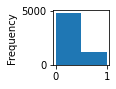

In [27]:
train_target.plot(kind ='hist', bins=2, figsize=(1,1))

In [28]:
predicted_tree = pd.Series(model_tree.predict(val_features))
tree_frequency = predicted_tree.value_counts(normalize=True)

predicted_forest = pd.Series(model_forest.predict(val_features))
forest_frequency = predicted_forest.value_counts(normalize=True)

predicted_linear = model_linear.predict(val_features)
linear_frequency = predicted_forest.value_counts(normalize=True)

print(tree_frequency, forest_frequency, linear_frequency, sep='\n')

0    0.7875
1    0.2125
dtype: float64
0    0.882
1    0.118
dtype: float64
0    0.882
1    0.118
dtype: float64


Баланс классов выборки составляет ~80%-20%, а в предсказаниях модели разброс от 79%-21% до ~89%-11%. Теперь проверяем с помощью константной модели.

In [29]:
target_pred_constant = pd.Series(0, index=val_target.index)
print(accuracy_score(val_target, target_pred_constant))

0.796


Accuracy константной модели даже больше, чем у модели решающего дерева, а значит, качество ответов низкое. Скорее всего, этим страдают и обе других модели.

Теперь посмотрим на матрицы ошибок каждой модели и их метрики.

In [30]:
def quality_metrics(model, features, valid):
    prediction = model.predict(features)
    probabilities_one_valid = model.predict_proba(features)[:, 1]
    auc_roc = roc_auc_score(valid, probabilities_one_valid)
    print(model)
    print('Матрица ошибок:\n', confusion_matrix(valid, prediction))
    print('Полнота:', recall_score(valid, prediction))
    print('Точность:', precision_score(valid, prediction))
    print('F1-мера:', f1_score(valid, prediction))
    print('AUC-ROC:', roc_auc_score(valid, probabilities_one_valid))
    print()

models = [model_tree, model_forest, model_linear]
for model in models:
    quality_metrics(model, val_features, val_target)

DecisionTreeClassifier(random_state=123)
Матрица ошибок:
 [[1369  223]
 [ 206  202]]
Полнота: 0.4950980392156863
Точность: 0.4752941176470588
F1-мера: 0.4849939975990396
AUC-ROC: 0.6775113311656322

RandomForestClassifier(random_state=123)
Матрица ошибок:
 [[1534   58]
 [ 230  178]]
Полнота: 0.4362745098039216
Точность: 0.7542372881355932
F1-мера: 0.5527950310559007
AUC-ROC: 0.8489968223470292

LogisticRegression(random_state=123, solver='liblinear')
Матрица ошибок:
 [[1522   70]
 [ 322   86]]
Полнота: 0.2107843137254902
Точность: 0.5512820512820513
F1-мера: 0.3049645390070922
AUC-ROC: 0.7316392009064931



## Борьба с дисбалансом

Все модели демонстрируют уклонение в сторону негативных ответов (0 в столбце Exited, т.е. предсказывается, что клиент из банка НЕ уйдёт) и низкую полноту. 0 в этом столбце встречается чаще, следовательно, баланс классов влияет на ответы модели. Самые высокие метрики показал случайный лес, проверяем его ROC-кривую.

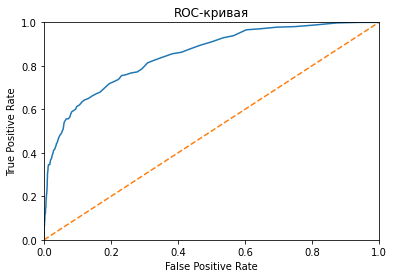

In [31]:
forest_probabilities_one_valid = model_forest.predict_proba(val_features)[:, 1]
auc_roc_forest = roc_auc_score(val_target, forest_probabilities_one_valid)
fpr, tpr, thresholds = roc_curve(val_target, forest_probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Всё же ROC-кривая проходит достаточно низко. Попробуем сбалансировать классы.

Accuracy score 0.85
AUC-ROC 0.8326112794363976


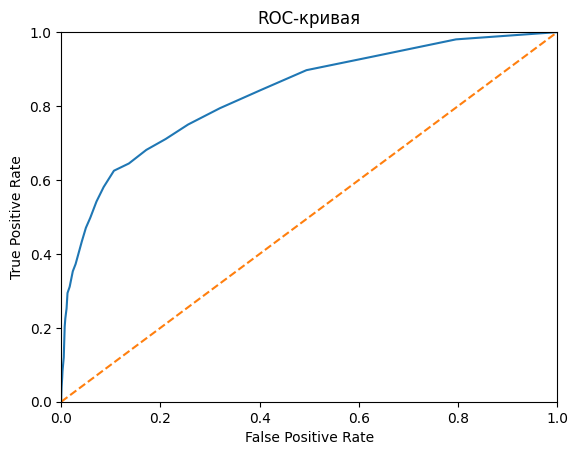

In [33]:
model_forest = RandomForestClassifier(random_state=123, n_estimators=30, class_weight='balanced')
model_forest.fit(train_features, train_target)
probabilities_one_valid_class_weight = model_forest.predict_proba(val_features)[:, 1]
print("Accuracy score", accuracy_score(model_forest.predict(val_features), val_target))
print("AUC-ROC", roc_auc_score(val_target, probabilities_one_valid_class_weight))

fpr, tpr, thresholds = roc_curve(val_target, probabilities_one_valid_class_weight) 
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Лучше результат не стал. Нужно сформировать сбалансированные выборки.

In [34]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=123)
    
    return features_upsampled, target_upsampled

train_features_upsampled, train_target_upsampled = upsample(train_features, train_target, 4)
print(train_target_upsampled.value_counts(normalize = 1))
print(train_target_upsampled.shape)

1    0.50569
0    0.49431
Name: Exited, dtype: float64
(9666,)


Поскольку в исходной выборке `train_target` варианта 1 в 4 раза меньше, чем варианта 0, умножаем на 4 и получаем практически равное распределение. Обучаем модели заново на сбалансированных выборках.

In [35]:
model_tree2 = DecisionTreeClassifier(random_state=123)
model_tree2.fit(train_features_upsampled, train_target_upsampled)
val_pred_tree = model_tree2.predict(val_features)
print(accuracy_score(val_target, val_pred_tree))

0.796


In [36]:
model_forest2 = RandomForestClassifier(random_state=123)
model_forest2.fit(train_features_upsampled, train_target_upsampled)
val_pred_forest = model_forest2.predict(val_features)
print(accuracy_score(val_target, val_pred_forest))

0.8475


In [37]:
model_linear2 = LogisticRegression(random_state=123, solver='liblinear')
model_linear2.fit(train_features_upsampled, train_target_upsampled)
val_pred_linear = model_linear2.predict(val_features)
print(accuracy_score(val_target, val_pred_linear))

0.6865


Метрика accuracy почти не изменилась или даже снизилась, но что с качеством ответов?

In [38]:
models = [model_tree2, model_forest2, model_linear2]
for model in models:
    quality_metrics(model, val_features, val_target)

DecisionTreeClassifier(random_state=123)
Матрица ошибок:
 [[1392  200]
 [ 208  200]]
Полнота: 0.49019607843137253
Точность: 0.5
F1-мера: 0.495049504950495
AUC-ROC: 0.6822839688639275

RandomForestClassifier(random_state=123)
Матрица ошибок:
 [[1477  115]
 [ 190  218]]
Полнота: 0.5343137254901961
Точность: 0.6546546546546547
F1-мера: 0.5883940620782726
AUC-ROC: 0.7310387722928366

LogisticRegression(random_state=123, solver='liblinear')
Матрица ошибок:
 [[1108  484]
 [ 143  265]]
Полнота: 0.6495098039215687
Точность: 0.3538050734312417
F1-мера: 0.4580812445980985
AUC-ROC: 0.6727448517095281



Показатели всех моделей улучшились, но всё же F1-мера не доходит до необходимого значения более 0.59. Попробуем улучшить модель подбором параметров. Сохраняем их в списке.

In [72]:
output = []
for est in range (10, 100, 10):
    for depth in range (1, 10):
        best_score = 0
        out = []
        model = RandomForestClassifier(random_state=123, n_estimators=est, max_depth=depth)
        model.fit(train_features_upsampled, train_target_upsampled)
        val_pred = model.predict(val_features)
        acc = accuracy_score(val_target, val_pred)
        if acc > best_score:
            best_score = acc
            out.append(best_score)
            out.append(est)
            out.append(depth)
        output.append(out)
# а теперь перебираем список по индексам, чтобы найти максимальную аккуратность
max_value = 0
for i in range(len(output)):
    if output[i][0] > max_value:
        max_value = output[i][0]
for i in range(len(output)):
    if output[i][0] == max_value:
        print(output[i])

[0.8085, 60, 9]


Обучаем модель с найденными параметрами и смотрим её метрики.

In [74]:
model = RandomForestClassifier(random_state=123, n_estimators=60, max_depth=9)
model.fit(train_features_upsampled, train_target_upsampled)
quality_metrics(model, val_features, val_target)

RandomForestClassifier(max_depth=9, n_estimators=60, random_state=123)
Матрица ошибок:
 [[1343  249]
 [ 134  274]]
Полнота: 0.6715686274509803
Точность: 0.5239005736137667
F1-мера: 0.5886143931256712
AUC-ROC: 0.7575807961375504



## Тестирование модели

In [75]:
quality_metrics(model, test_features, test_target)

RandomForestClassifier(max_depth=9, n_estimators=60, random_state=123)
Матрица ошибок:
 [[1343  250]
 [ 111  296]]
Полнота: 0.7272727272727273
Точность: 0.5421245421245421
F1-мера: 0.6211962224554038
AUC-ROC: 0.7851680648290817



RandomForestClassifier(max_depth=9, n_estimators=60, random_state=123)
Accuracy score 0.8195
AUC-ROC 0.8665460529867309


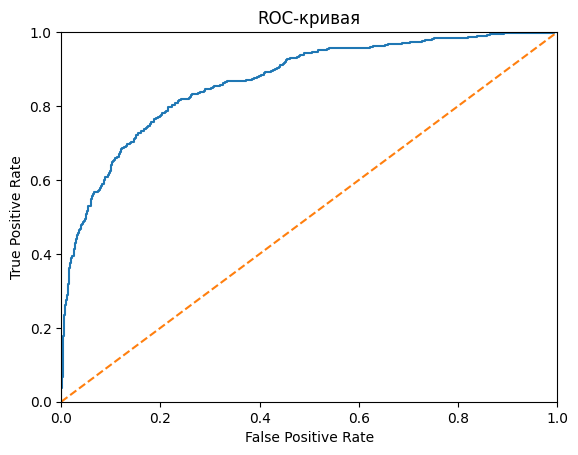

In [79]:
probabilities_one_valid_final = model.predict_proba(test_features)[:, 1]
print(model)
print("Accuracy score", accuracy_score(model.predict(test_features), test_target))
print("AUC-ROC", roc_auc_score(test_target, probabilities_one_valid_final))

fpr, tpr, thresholds = roc_curve(test_target, probabilities_one_valid_final) 
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

На тестовой выборке достигнуто значение F1-меры, равное 0.62, что больше 0.59. Также модель показывает хорошее значение полноты (~0.73 из максимальной 1), то есть, она хорошо выдаёт положительные результаты (положительный результат - уход клиента из банка, т.е. 1 в столбце Exited). Точность не очень высока - 0.54, т.е. ложноположительных значений почти столько же, сколько и истинно положительных, модель предскажет примерно в 2 раза больше ушедших клиентов, чем уйдёт на самом деле. Всё же она прошла проверку на адекватность по сравнению с константной моделью, заполненной нулями.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*